In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
from functools import reduce

In [2]:

tran = pd.read_excel("C:/Users/sanja/Desktop/my files/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='Transactions')

In [3]:
demo = pd.read_excel("C:/Users/sanja/Desktop/my files/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='CustomerDemographic')

In [5]:
Addr = pd.read_excel("C:/Users/sanja/Desktop/KPMG.xlsx", sheet_name='CustomerAddress')

In [6]:
df1 = [tran, demo, Addr]

In [7]:

df= reduce(lambda left,right: pd.merge(left,right,on='customer_id'), df1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19959 entries, 0 to 19958
Data columns (total 30 columns):
transaction_id                         19959 non-null int64
product_id                             19959 non-null int64
customer_id                            19959 non-null int64
transaction_date                       19959 non-null datetime64[ns]
online_order                           19600 non-null float64
order_status                           19959 non-null object
brand                                  19765 non-null object
product_line                           19765 non-null object
product_class                          19765 non-null object
product_size                           19765 non-null object
list_price                             19959 non-null float64
standard_cost                          19765 non-null float64
product_first_sold_date                19765 non-null float64
first_name                             19959 non-null object
last_name                   

In [9]:
dat = df[['customer_id', 'transaction_date','order_status','online_order',
          'product_id', 'list_price']].copy()

In [10]:
dat


,customer_id,transaction_date,order_status,online_order,product_id,list_price
0,2950,2017-02-25,Approved,0.0,2,71.49
1,2950,2017-10-16,Approved,0.0,1,1403.50
2,2950,2017-04-26,Approved,0.0,62,478.16
3,3120,2017-05-21,Approved,1.0,3,2091.47
4,3120,2017-10-05,Approved,0.0,4,1129.13
5,3120,2017-10-30,Approved,1.0,91,100.35
6,3120,2017-01-30,Approved,0.0,95,569.56
7,3120,2017-01-20,Approved,1.0,38,1577.53
8,3120,2017-12-10,Approved,0.0,41,416.98
9,3120,2017-10-24,Approved,0.0,10,1466.68


In [11]:
data= dat[dat['order_status'] == 'Approved'] 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19781 entries, 0 to 19958
Data columns (total 6 columns):
customer_id         19781 non-null int64
transaction_date    19781 non-null datetime64[ns]
order_status        19781 non-null object
online_order        19428 non-null float64
product_id          19781 non-null int64
list_price          19781 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.1+ MB


# RFM Model



In [13]:
PRESENT = dt.datetime(2020,5,31)

In [14]:
rfm= data.groupby('customer_id').agg({'transaction_date': lambda date: (PRESENT - date.max()).days,
                                        'product_id': lambda num: num.count(),
                                        'list_price': lambda price: price.sum()})

In [15]:
rfm.columns=['recency','frequency','monetary']

In [16]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [17]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
customer_id,,,,,,,
1,890,11,9084.45,1,1,1,111
2,1011,3,4149.07,4,4,4,444
4,1078,2,1047.72,4,4,4,444
5,899,6,5903.20,1,3,3,133
6,947,5,5931.69,3,3,3,333


In [18]:
rfm['RFM_Score'].value_counts()

444    338
111    210
211    194
344    177
311    131
132    128
432    127
244    126
332    125
233    124
333    121
443    116
144    114
232    111
133    109
433    101
343     75
222     74
143     73
243     70
321     62
122     57
322     51
121     50
221     47
212     42
112     40
411     37
234     34
431     33
334     31
312     30
331     29
231     27
421     27
131     25
134     24
422     24
223     22
123     21
434     20
142     17
323     16
442     15
412     12
342     10
242      8
113      8
423      7
213      3
124      3
313      3
413      3
324      2
224      2
424      1
Name: RFM_Score, dtype: int64

In [19]:
 Rfm_top_customers =rfm[rfm['RFM_Score']>='333'].sort_values('monetary', ascending=False)

In [20]:
Rfm_top_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 1992 to 3292
Data columns (total 7 columns):
recency       1275 non-null int64
frequency     1275 non-null int64
monetary      1275 non-null float64
r_quartile    1275 non-null category
f_quartile    1275 non-null category
m_quartile    1275 non-null category
RFM_Score     1275 non-null object
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 54.1+ KB


In [21]:
combine = pd.merge(Rfm_top_customers,demo,on='customer_id')

In [22]:
combine


,customer_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1992,1023,10,14165.05,4,1,1,411,Shanta,Attrill,Female,28,1995-10-21,Web Developer I,Manufacturing,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,3.0
1,3212,982,8,13490.52,4,1,1,411,Corella,Bartomeu,Female,62,1981-01-15,Analog Circuit Design manager,Financial Services,Affluent Customer,N,ï¼ï¼ï¼,No,13.0
2,1043,1013,9,13023.58,4,1,1,411,Giorgi,Hurford,Male,34,1986-10-20,Sales Associate,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,16.0
3,1093,982,9,12492.40,4,1,1,411,Clarita,Penright,Female,63,1996-09-13,Business Systems Development Analyst,NaN,Affluent Customer,N,00ËÆ$-,No,5.0
4,565,987,10,12454.34,4,1,1,411,Saleem,Meller,Male,30,1959-10-02,Civil Engineer,Manufacturing,Mass Customer,N,00ËÆ$-,Yes,16.0
5,2885,977,9,12055.64,4,1,1,411,Minnie,Rolley,Female,70,1969-07-03,Compensation Analyst,Financial Services,Mass Customer,N,"""'",Yes,4.0
6,473,998,9,12033.62,4,1,1,411,Benji,O'Shirine,Male,2,1977-03-13,Junior Executive,Health,Mass Customer,N,(ï½¡â â âï½¡),Yes,20.0
7,1932,972,8,12027.44,4,1,1,411,Sybila,Enefer,Female,98,1977-01-03,Librarian,Entertainment,Affluent Customer,N,<svg><script>0<1>alert('XSS')</script>,Yes,3.0
8,3280,1017,8,11763.69,4,1,1,411,Micki,McNamara,Female,49,1987-05-02,General Manager,Financial Services,Mass Customer,N,`ââ¬â¹âºï¬ï¬â¡Â°Â·ââÂ±,Yes,21.0
9,2121,972,10,11645.45,4,1,1,411,Clarita,Jaqueminet,Female,35,1989-02-15,Nurse,Financial Services,Mass Customer,N,0/0,Yes,22.0


In [23]:
final = pd.merge(combine,Addr,on='customer_id')

In [24]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 25 columns):
customer_id                            1275 non-null int64
recency                                1275 non-null int64
frequency                              1275 non-null int64
monetary                               1275 non-null float64
r_quartile                             1275 non-null category
f_quartile                             1275 non-null category
m_quartile                             1275 non-null category
RFM_Score                              1275 non-null object
first_name                             1275 non-null object
last_name                              1232 non-null object
gender                                 1275 non-null object
past_3_years_bike_related_purchases    1275 non-null int64
DOB                                    1252 non-null datetime64[ns]
job_title                              1117 non-null object
job_industry_category                  106

In [25]:
ws=pd.get_dummies(final['wealth_segment'],columns='wealth_segment',prefix='wealth_segment')

final=pd.concat([final, ws], axis=1)


In [26]:
avg= final['tenure'].mean()

In [27]:
final["tenure"].fillna(avg, inplace = True)

In [28]:
now = pd.Timestamp('now')
final['age'] = now - final['DOB']
final['age'] =final['age'].astype('timedelta64[Y]')

In [29]:

final['age'].max()

84.0

In [30]:
final['age_bins'] = pd.cut(x=final['age'], bins=[15, 25, 35, 45, 55, 67])

In [31]:
age=pd.get_dummies(final['age_bins'],columns='age_bins',prefix='age')

final=pd.concat([final, age], axis=1)


In [32]:
avg_age= final['age'].mean()

In [33]:
final["age"].fillna(avg_age, inplace = True)

In [34]:
oc=pd.get_dummies(final['owns_car'],columns='owns_car',prefix='owns_car')

final=pd.concat([final, oc], axis=1)


In [35]:
final = final.replace('Femal', 'Female')
final = final.replace('F', 'Female')
final = final.replace('Female', 'Female')
final = final.replace('Male', 'male')
final = final.replace('M', 'male')

In [36]:
final.gender.unique()

array(['Female', 'male', 'U'], dtype=object)

In [37]:
gend=pd.get_dummies(final['gender'],columns='gender')

In [38]:
final=pd.concat([gend, final], axis=1)

In [39]:
final['job_industry_category'].unique()

array(['Manufacturing', 'Financial Services', nan, 'Health',
       'Entertainment', 'Property', 'Retail', 'IT', 'Argiculture',
       'Telecommunications'], dtype=object)

In [40]:
job=pd.get_dummies(final['job_industry_category'],columns='job_industry_category',prefix='industry')

final=pd.concat([final, job], axis=1)

In [41]:
final.drop('default', axis=1, inplace=True)

In [42]:
final.drop('deceased_indicator', axis=1, inplace=True)

In [43]:
final.drop('DOB', axis=1, inplace=True)

In [44]:
final['state'].unique()

array(['NSW', 'QLD', 'Victoria', 'VIC', 'New South Wales'], dtype=object)

In [45]:
final = final.replace("VIC", "Victoria")
final = final.replace("New South Wales", "NSW")

In [46]:
final['state'].unique()

array(['NSW', 'QLD', 'Victoria'], dtype=object)

In [47]:
state=pd.get_dummies(final['state'],columns='state')

In [48]:
final=pd.concat([final, state], axis=1)

In [49]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 49 columns):
Female                                 1275 non-null int64
U                                      1275 non-null int64
male                                   1275 non-null int64
customer_id                            1275 non-null int64
recency                                1275 non-null int64
frequency                              1275 non-null int64
monetary                               1275 non-null float64
r_quartile                             1275 non-null object
f_quartile                             1275 non-null object
m_quartile                             1275 non-null object
RFM_Score                              1275 non-null object
first_name                             1275 non-null object
last_name                              1232 non-null object
gender                                 1275 non-null object
past_3_years_bike_related_purchases    1275 non-null int64

In [50]:
final['state'].value_counts()

NSW         661
Victoria    344
QLD         270
Name: state, dtype: int64

In [51]:
df1 = final[['Female','male','past_3_years_bike_related_purchases',
          'wealth_segment_Affluent Customer', 'wealth_segment_High Net Worth', 'wealth_segment_Mass Customer', 'age_(15, 25]',
          'age_(25, 35]','age_(35, 45]','age_(45, 55]','age_(55, 67]',    
        'tenure', 'NSW','Victoria','QLD', 'industry_Argiculture', 
                  'industry_Entertainment','industry_Financial Services','industry_Health','industry_IT','industry_Manufacturing',
          'industry_Property','industry_Retail','industry_Telecommunications','monetary'
                  ]]

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 25 columns):
Female                                 1275 non-null int64
male                                   1275 non-null int64
past_3_years_bike_related_purchases    1275 non-null int64
wealth_segment_Affluent Customer       1275 non-null int64
wealth_segment_High Net Worth          1275 non-null int64
wealth_segment_Mass Customer           1275 non-null int64
age_(15, 25]                           1275 non-null int64
age_(25, 35]                           1275 non-null int64
age_(35, 45]                           1275 non-null int64
age_(45, 55]                           1275 non-null int64
age_(55, 67]                           1275 non-null int64
tenure                                 1275 non-null float64
NSW                                    1275 non-null uint8
Victoria                               1275 non-null uint8
QLD                                    1275 non-null uint8
indust

In [53]:
corr = df1.corr()

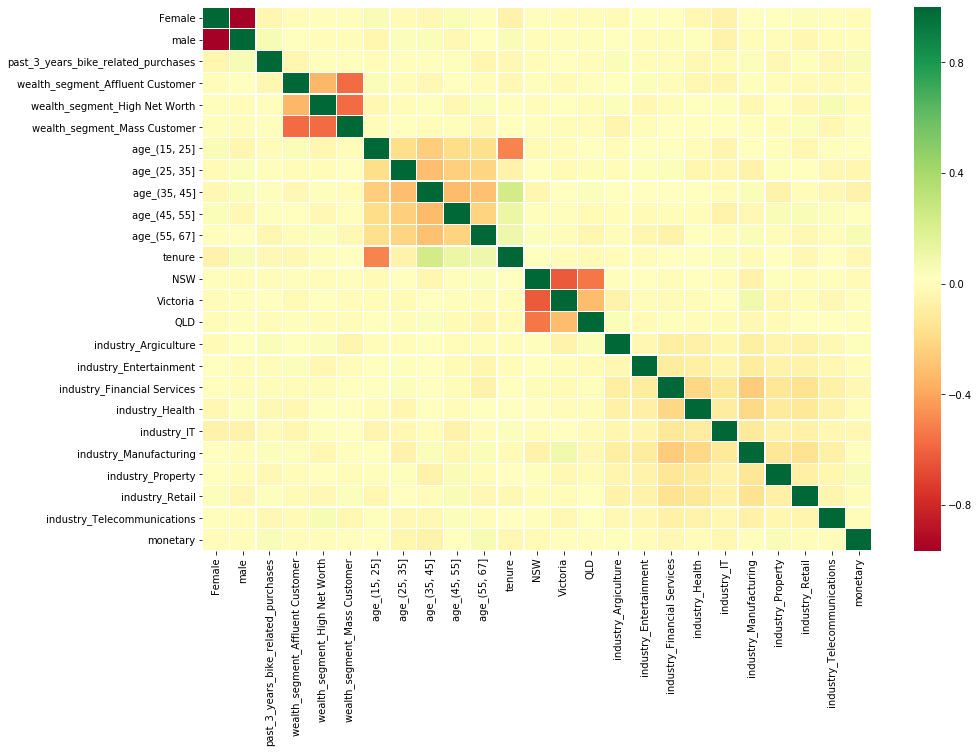

In [54]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, cmap='RdYlGn', linewidth=0.30, ax=ax)

In [55]:
df2 = final[['gender','past_3_years_bike_related_purchases',
          'wealth_segment',  'age_bins',    
        'tenure', 'state', 'job_industry_category','monetary','owns_car','property_valuation', 'country','postcode'
                  ]]

In [56]:
df2.to_csv("kpmg_rfm4.csv")

In [57]:
df2['state'].value_counts()

NSW         661
Victoria    344
QLD         270
Name: state, dtype: int64

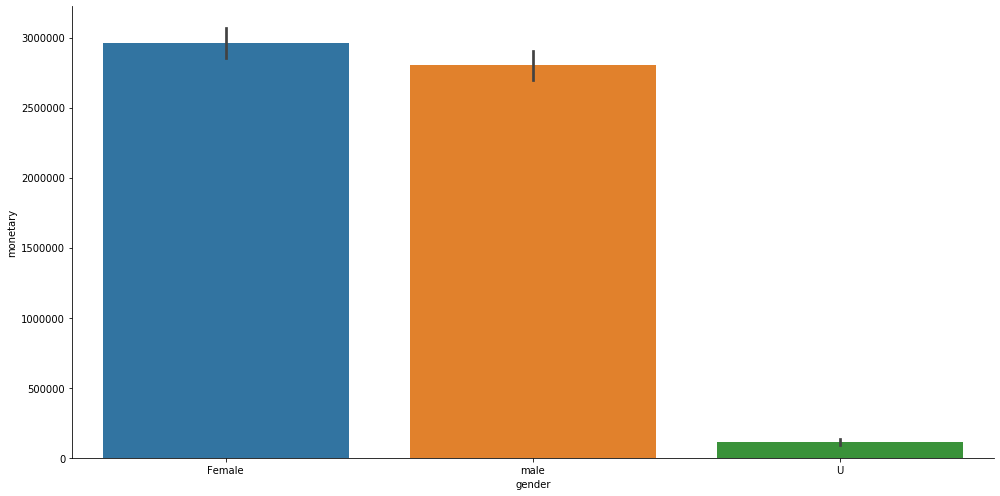

In [58]:
gen= sns.catplot(x="gender", y="monetary", data=df2,kind="bar",  height=7, aspect=2, estimator=sum)

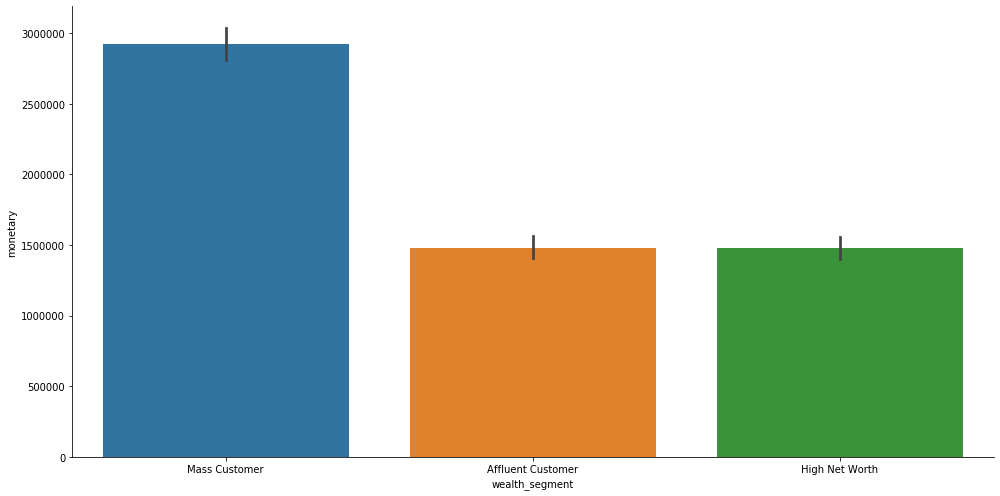

In [59]:
wealth= sns.catplot(x="wealth_segment", y="monetary", data=df2,kind="bar",  height=7, aspect=2, estimator=sum)


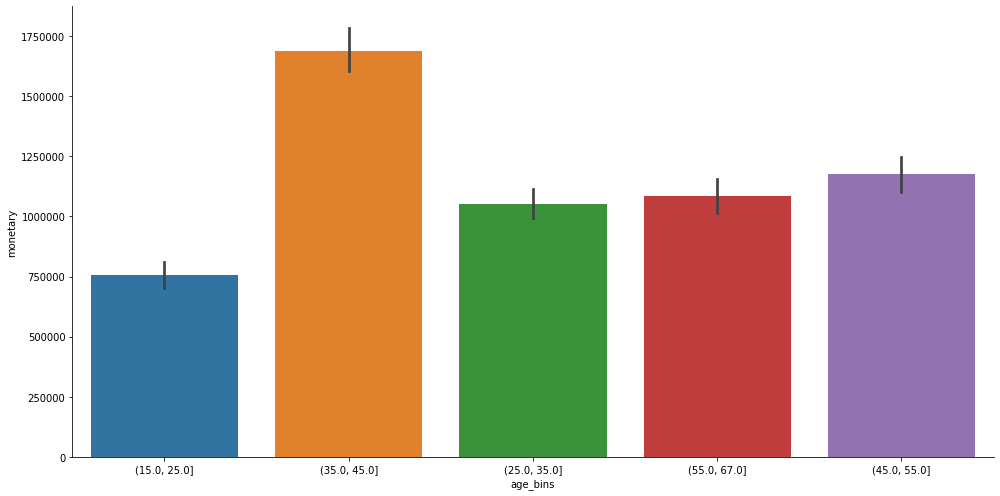

In [60]:
age= sns.catplot(x="age_bins", y="monetary", data=df2,kind="bar",  height=7, aspect=2, estimator=sum)


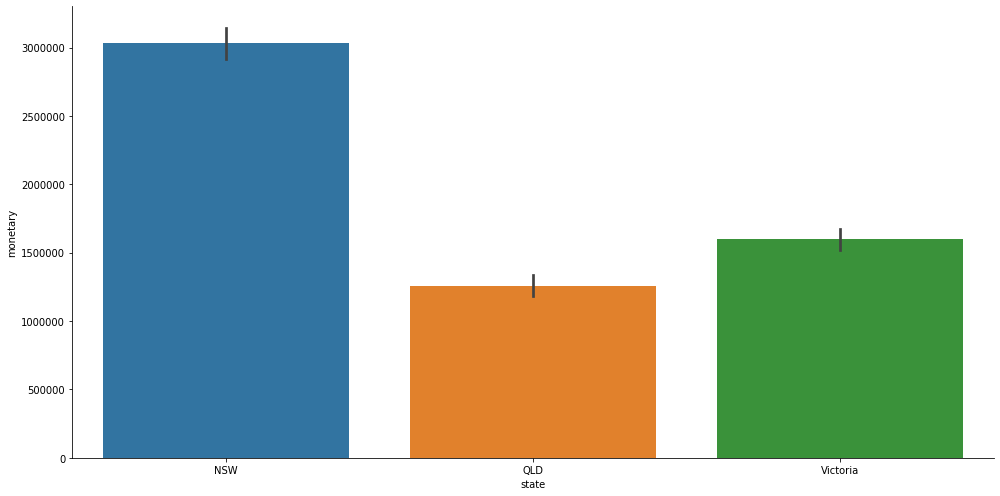

In [62]:
age= sns.catplot(x="state", y="monetary", data=df2,kind="bar",  height=7, aspect=2, estimator=sum)


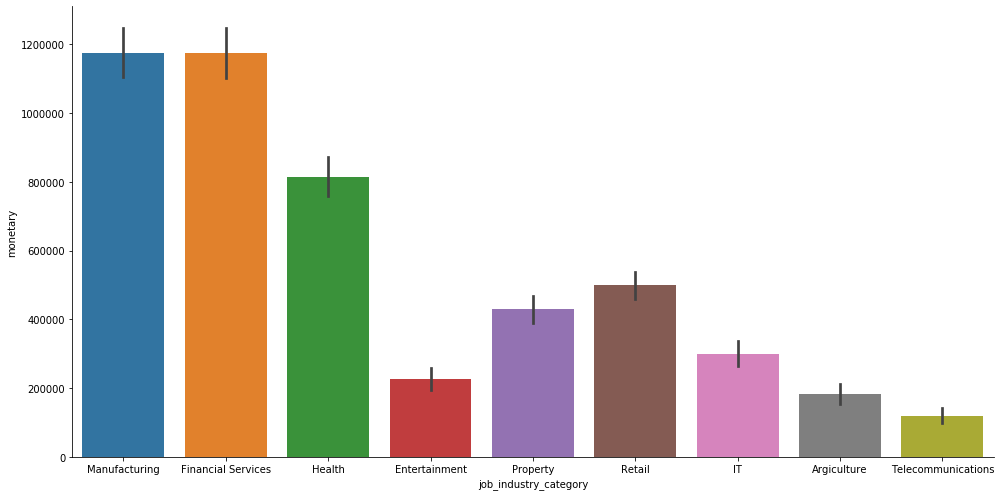

In [63]:
industry= sns.catplot(x="job_industry_category", y="monetary", data=df2,kind="bar",  height=7, aspect=2, estimator=sum)

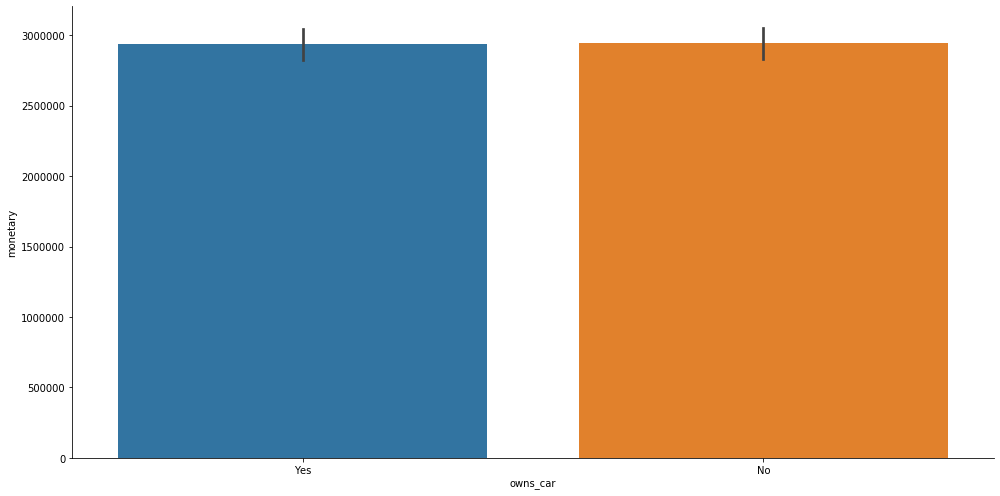

In [64]:
industry= sns.catplot(x="owns_car", y="monetary", data=df2,kind="bar",  height=7, aspect=2, estimator=sum)

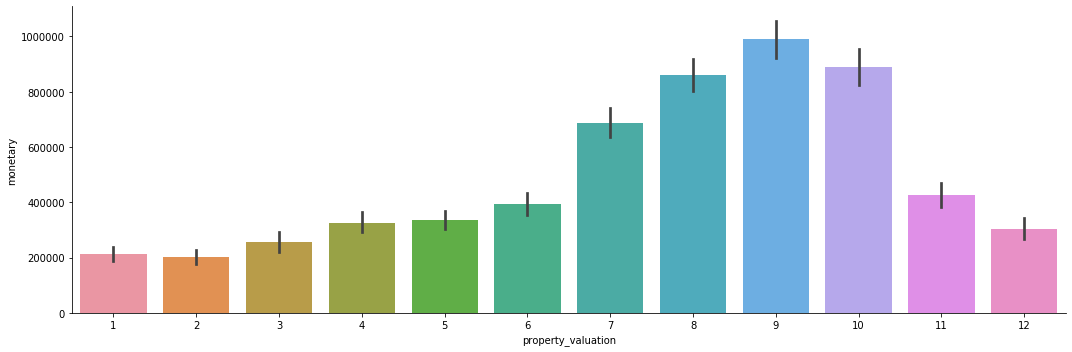

In [65]:
industry= sns.catplot(x="property_valuation", y="monetary", data=df2,kind="bar",  height=5, aspect=3, estimator=sum)

